<h1><center> Credit Card Fraud Detection </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

In this project, credit card transactions are used to rain a model and to classify wethter the transation is fraud or not. The dataset includes information about transactions made by credit cards in September 2013 by European cardholders. Decision Tree and Supoort Vector Machine methods are used here. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Visualization</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Decision Tree</li>
                <li>SVM</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

In [1]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 1. Download Data

The data set is from Kaggle dataset. Here downloaded it and uploaded it to the Jupyter Notebook. The link is https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
file_name='creditcard.csv'

In [4]:
#download the data
credit_card_data = pd.read_csv(file_name)

In [5]:
# size of data 
NR = np.size(credit_card_data,0)
NC = np.size(credit_card_data,1)
print('There are ', NR, ' samples of data and ', NC, ' properties')

There are  284807  samples of data and  31  properties


In [6]:
#display the first 10 rows of data
credit_card_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Each row in the dataset represents a credit card transation. As shown above, each row has 31 variables. The last column is called __Class__, which represents the target variable. 

In practice, a financial institution may have accesss to a much larger dataset of transactions. To simulate such as case, the data are inflated 10 times. 

In [7]:
n_replicas = 10
# inflate the original dataset
CC_data = pd.DataFrame(np.repeat(credit_card_data.values, n_replicas, axis=0), columns=credit_card_data.columns)

NR = np.size(CC_data,0)
NC = np.size(CC_data,1)
print('There are ', NR, ' samples of data and ', NC, ' properties')

There are  2848070  samples of data and  31  properties


## 2. Data Wrangling

In [8]:
#Evaluating the missing data
missing_data = CC_data.isnull()
missing_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" measn the data is missing. From the first 5 rows, there seem no missing data. 

In [9]:
#Here use info() to count non-null values or missing values in each column
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848070 entries, 0 to 2848069
Data columns (total 31 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Time    float64
 1   V1      float64
 2   V2      float64
 3   V3      float64
 4   V4      float64
 5   V5      float64
 6   V6      float64
 7   V7      float64
 8   V8      float64
 9   V9      float64
 10  V10     float64
 11  V11     float64
 12  V12     float64
 13  V13     float64
 14  V14     float64
 15  V15     float64
 16  V16     float64
 17  V17     float64
 18  V18     float64
 19  V19     float64
 20  V20     float64
 21  V21     float64
 22  V22     float64
 23  V23     float64
 24  V24     float64
 25  V25     float64
 26  V26     float64
 27  V27     float64
 28  V28     float64
 29  Amount  float64
 30  Class   float64
dtypes: float64(31)
memory usage: 673.6 MB


Nice. There is no missing data in this dataset. And data format look all correct. 

## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data. Here, we use visulization and describe to see the distribution of __Class__.

Let's first calculate the correlation between variabels. 

In [10]:
CC_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,-8.884404e-16,7.953267e-15,-2.488502e-15,3.153933e-15,-2.071506e-15,3.913700e-15,1.240264e-16,-2.428928e-15,...,-2.371472e-16,1.215643e-15,1.194843e-15,-4.979536e-16,5.000599e-16,-6.274602e-16,6.915352e-16,-3.393401e-15,-0.227709,-0.101347
V2,-0.010593,-8.884404e-16,1.000000e+00,7.398376e-16,-2.388844e-15,-1.550289e-15,-2.863499e-16,-5.645546e-16,2.674191e-16,-1.173970e-16,...,8.973456e-17,-3.057510e-16,1.047822e-15,-5.326729e-17,-1.047601e-15,7.930746e-17,-1.883474e-16,-6.972788e-16,-0.531409,0.091289
V3,-0.419618,7.953267e-15,7.398376e-16,1.000000e+00,1.099369e-16,2.459281e-15,1.432124e-15,7.998478e-15,1.027026e-15,-4.266535e-16,...,3.716557e-16,-2.129121e-16,9.864957e-17,-2.384504e-18,-6.219206e-15,2.039799e-15,-1.823964e-15,2.085935e-16,-0.210880,-0.192961
V4,-0.105260,-2.488502e-15,-2.388844e-15,1.099369e-16,1.000000e+00,-1.440232e-15,-8.851506e-16,8.082810e-16,-1.385664e-15,1.178219e-15,...,-5.370536e-16,1.290554e-15,2.003964e-16,1.512602e-16,1.553097e-16,-5.475850e-16,-1.504195e-16,-9.195383e-17,0.098732,0.133447
V5,0.173072,3.153933e-15,-1.550289e-15,2.459281e-15,-1.440232e-15,1.000000e+00,-1.867095e-16,-1.531992e-15,-1.115041e-16,3.101758e-16,...,-1.344583e-15,-2.561170e-15,5.420241e-16,-1.001342e-15,-3.395574e-16,9.066845e-16,4.160481e-16,-1.680837e-16,-0.386356,-0.094974
V6,-0.063016,-2.071506e-15,-2.863499e-16,1.432124e-15,-8.851506e-16,-1.867095e-16,1.000000e+00,5.578963e-16,-1.916298e-15,-1.041125e-15,...,-4.807695e-16,8.634744e-16,4.375257e-16,-1.023345e-15,-1.301813e-16,3.333837e-17,1.271926e-16,-3.919246e-16,0.215981,-0.043643
V7,0.084714,3.913700e-15,-5.645546e-16,7.998478e-15,8.082810e-16,-1.531992e-15,5.578963e-16,1.000000e+00,-2.088658e-15,1.719473e-16,...,8.585483e-17,-3.638405e-16,5.671925e-17,-9.823948e-17,1.914668e-15,-2.791833e-16,-9.314694e-16,5.291641e-16,0.397311,-0.187257
V8,-0.036949,1.240264e-16,2.674191e-16,1.027026e-15,-1.385664e-15,-1.115041e-16,-1.916298e-15,-2.088658e-15,1.000000e+00,2.661755e-16,...,6.830181e-16,-1.387631e-15,1.568414e-16,1.101525e-16,1.829557e-16,-3.174651e-17,-5.932725e-17,-1.031045e-16,-0.103079,0.019875
V9,-0.008660,-2.428928e-15,-1.173970e-16,-4.266535e-16,1.178219e-15,3.101758e-16,-1.041125e-15,1.719473e-16,2.661755e-16,1.000000e+00,...,4.355663e-16,4.530327e-16,2.130271e-15,-1.493500e-16,-9.925191e-16,2.572877e-16,-4.425761e-17,5.054282e-16,-0.044246,-0.097733


From above table, none of the variables are highly correlated with __Class__. 

In [11]:
CC_data['Class'].value_counts()

Class
0.0    2843150
1.0       4920
Name: count, dtype: int64

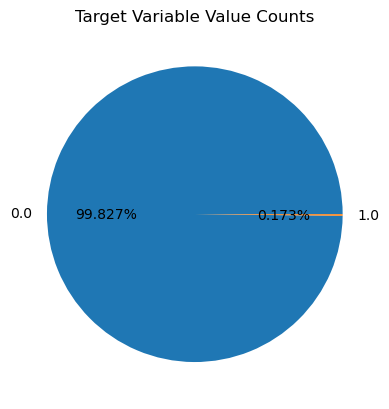

In [12]:
# plot the class value counts
fig, ax = plt.subplots()
ax.pie(CC_data['Class'].value_counts().values, labels=CC_data['Class'].unique(), autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

Value counts and plot show that there are two classes: 0 ( the credit card transaction is legitimate) and 1 ( the credit card transaction is fraudulent). Thus, this is a binary classification problem. Moreoever, the data is heavily unbalanced. the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

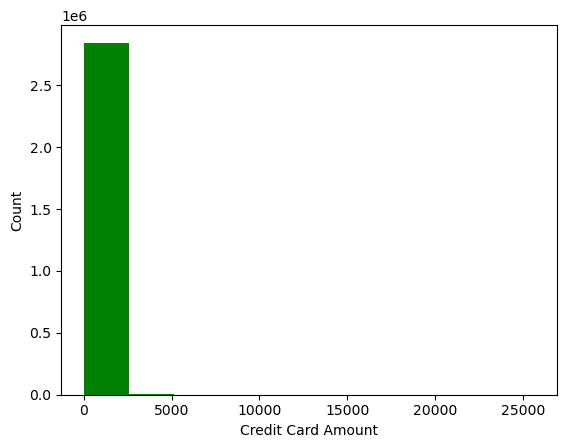

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [13]:
#plot the amount using histogram
plt.hist(CC_data['Amount'], histtype='bar', facecolor='g')
plt.xlabel('Credit Card Amount')
plt.ylabel('Count')
plt.show()
print("Minimum amount value is ", np.min(CC_data['Amount']))
print("Maximum amount value is ", np.max(CC_data['Amount']))
print("90% of the transactions have an amount less or equal than ", np.percentile(CC_data['Amount'], 90))

In [14]:
CC_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,...,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06
mean,9.481386e+04,1.066506e-15,3.519096e-16,-1.070418e-15,2.068746e-15,1.096205e-15,1.498769e-15,-5.666639e-16,1.029064e-16,-2.423929e-15,...,1.643489e-16,-3.560610e-16,2.707081e-16,4.472248e-15,5.808345e-16,1.683092e-15,-3.659629e-16,-1.243170e-16,8.834962e+01,1.727486e-03
std,4.748807e+04,1.958693e+00,1.651306e+00,1.516253e+00,1.415866e+00,1.380245e+00,1.332269e+00,1.237092e+00,1.194351e+00,1.098630e+00,...,7.345229e-01,7.257004e-01,6.244593e-01,6.056461e-01,5.212772e-01,4.822263e-01,4.036319e-01,3.300827e-01,2.501197e+02,4.152712e-02
min,0.000000e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000e+00,0.000000e+00
25%,5.420100e+04,-9.203749e-01,-5.985546e-01,-8.903718e-01,-8.486429e-01,-6.916019e-01,-7.682961e-01,-5.540842e-01,-2.086314e-01,-6.430992e-01,...,-2.283999e-01,-5.423525e-01,-1.618464e-01,-3.545929e-01,-3.171470e-01,-3.269890e-01,-7.083969e-02,-5.296012e-02,5.600000e+00,0.000000e+00
50%,8.469200e+04,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,2.200000e+01,0.000000e+00
75%,1.393210e+05,1.315648e+00,8.037276e-01,1.027201e+00,7.433540e-01,6.119269e-01,3.985694e-01,5.704465e-01,3.273459e-01,5.971404e-01,...,1.863843e-01,5.285552e-01,1.476421e-01,4.395273e-01,3.507157e-01,2.409571e-01,9.104646e-02,7.828090e-02,7.717000e+01,0.000000e+00
max,1.727920e+05,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,2.569116e+04,1.000000e+00


### 4. Model Development

In this section, a SVM ( Support Vector Machines) and a Decision Tree models are developed to classify the credit card transactions.  The SVM algorithm offers a choice of kernel functions for performing its processing. But traditional SVM cannot handle large data set. Here uses linearSVC, which can work on large data set. 

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks.

#### 4.0 Data Preprocessing

Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

In [15]:
# standardize features by removing the mean and scaling to unit variance
CC_data.iloc[:, 1:30] = StandardScaler().fit_transform(CC_data.iloc[:, 1:30])
data_matrix = CC_data.values

#### 4.1 Decision Tree

In [16]:
#import libraries
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [17]:
#save the variabels and class to new variables
Variables = data_matrix[:, 1:30]
Variables = normalize(Variables, norm="l1")
CC_class = data_matrix[:, 30]

In [18]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(Variables, CC_class, test_size=0.30, random_state=42, stratify=CC_class)

In [19]:
# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)

In [20]:
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

In [21]:
sklearn_dt.fit(x_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [22]:
#Let's calcualte the R^2 on the train data
r2 = sklearn_dt.score(x_train, y_train)
print('The R-square of Decision Tree is: ', round(r2,4))

The R-square of Decision Tree is:  0.9655


In [23]:
#Let's calcualte the R^2 on the test data
r2t = sklearn_dt.score(x_test, y_test)
print('The R-square of Decision Tree is: ', round(r2t,4))

The R-square of Decision Tree is:  0.9657


In [24]:
#predict price using test data
dt_predict = sklearn_dt.predict(x_test)

In [25]:
mse = mean_squared_error(y_test, dt_predict)
print('The mean square error of class and predicted value is: ', round(mse,2))

The mean square error of class and predicted value is:  0.03


In [26]:
roc = roc_auc_score(y_test, dt_predict)
print('The ROC AUC of class and predicted value is: ', round(roc,2))

The ROC AUC of class and predicted value is:  0.94


In [27]:
from sklearn.metrics import f1_score
f1s = f1_score(y_test, dt_predict, average='weighted') 
print('The f1_score of Decision Tree is: ', round(f1s,4))

The f1_score of Decision Tree is:  0.981


In [28]:
from sklearn.metrics import jaccard_score
jsc = jaccard_score(y_test, dt_predict, pos_label=0) 
print('The jaccard score of Decision Tree is: ', round(jsc,4))

The jaccard score of Decision Tree is:  0.9657


In [29]:
#Let's create a dataframe to record all scores
scores = pd.DataFrame(columns=['Kernel', 'R^2', 'MSE', ' ROC AUC', 'F1 Score',' Jaccard score'], index=[0, 1])

In [30]:
scores.loc[0] = ['Decision Tree', r2t, mse, roc, f1s, jsc]      

In [31]:
# Visualize the results
# import the visualization package: seaborn
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    852945
         1.0       0.04      0.91      0.08      1476

    accuracy                           0.97    854421
   macro avg       0.52      0.94      0.53    854421
weighted avg       1.00      0.97      0.98    854421

Confusion matrix, without normalization
[[823807  29138]
 [   132   1344]]


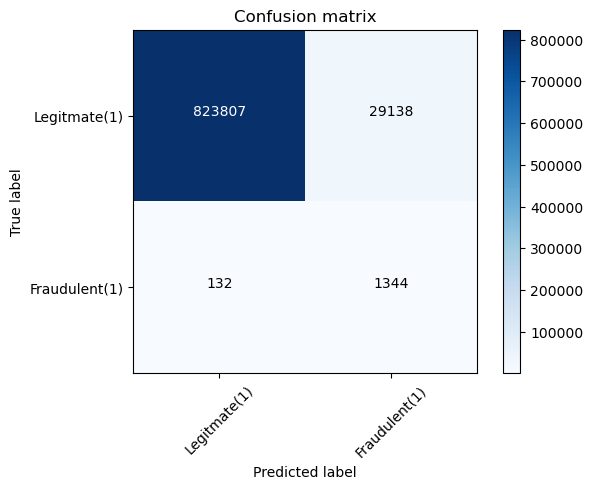

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, dt_predict, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, dt_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Legitmate(1)','Fraudulent(1)'],normalize= False,  title='Confusion matrix')

#### 4.2 SVM (Support Vector Machine)

The data set is too big for normal SVM modeling. So here uses LinearSVC instead.

In [35]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
svm.fit(x_train, y_train)
svm_predict = svm.predict(x_test)

In [37]:
#Let's calcualte the R^2 on the train data
print('The R-square of SVM on train data is: ', round(svm.score(x_train, y_train),4))
#Let's calcualte the R^2 on the test data
r2t = svm.score(x_test, y_test)
print('The R-square of SVM on test data is: ', round(r2t,4))
#mean square error
mse = mean_squared_error(y_test, svm_predict)
print('The mean square error of class and predicted value is: ', round(mse,2))
roc = roc_auc_score(y_test, svm_predict)
print('The ROC AUC of class and predicted value is: ', round(roc,2))
#f1 score
f1s = f1_score(y_test, svm_predict, average='weighted') 
print('The f1_score of SVM is: ', round(f1s,4))
#jaccard score
jsc = jaccard_score(y_test, svm_predict, pos_label=0) 
print('The jaccard score of SVM is: ', round(jsc,4))
scores.loc[1] = ['SVM', r2t, mse, roc, f1s, jsc]   

The R-square of SVM on train data is:  0.9439
The R-square of SVM on test data is:  0.9445
The mean square error of class and predicted value is:  0.06
The ROC AUC of class and predicted value is:  0.94
The f1_score of SVM is:  0.9698
The jaccard score of SVM is:  0.9444


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    852945
         1.0       0.03      0.93      0.06      1476

    accuracy                           0.94    854421
   macro avg       0.51      0.94      0.51    854421
weighted avg       1.00      0.94      0.97    854421

Confusion matrix, without normalization
[[805646  47299]
 [    96   1380]]


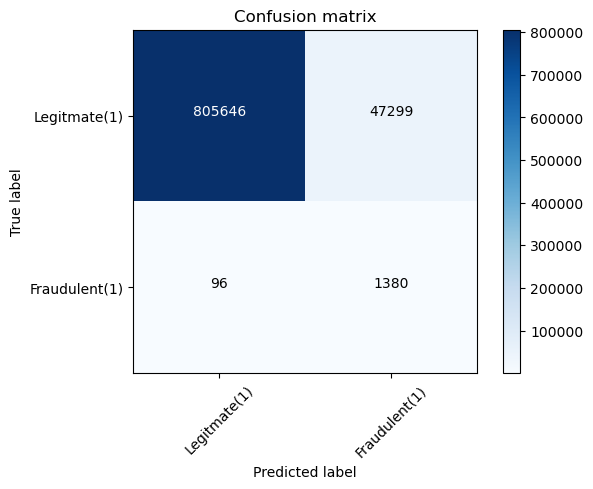

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_predict, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Legitmate(1)','Fraudulent(1)'],normalize= False,  title='Confusion matrix')

In [40]:
#print all scores and compare.
scores

,Kernel,R^2,MSE,ROC AUC,F1 Score,Jaccard score
0,Decision Tree,0.965743,0.034257,0.938204,0.980993,0.965689
1,SVM,0.94453,0.05547,0.939753,0.969843,0.94444


For this typical data set, Decision Tree fitted the data better than SVM. 